In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d

df = pd.read_csv("scalarData.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax')
df

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,topo,bestTx,pions
8484,499.4427,386.3139,385.8176,0.4963,0.004635,0.000015,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S,True
9504,456.0158,390.7605,390.2674,0.4931,0.004730,0.000017,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S,True
2274,402.8527,377.3270,376.8308,0.4962,0.004637,0.000018,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S,True
18512,443.2197,374.8294,374.3386,0.4908,0.004797,0.000025,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S,True
9100,390.6307,363.9185,363.4252,0.4933,0.004724,0.000027,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S,True
...,...,...,...,...,...,...,...,...,...,...
9176,114.5173,102.3744,102.3066,0.0678,942.927382,54.134200,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,False
7825,109.3860,103.4855,103.4249,0.0606,1662.883382,55.125540,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,False
8186,108.2107,102.4117,102.3617,0.0500,4337.082957,56.583420,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,False
6479,107.9782,100.5820,100.5166,0.0654,1136.537662,57.481690,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,False


In [100]:
excl = df[df['rmax'] > 1]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = excl[excl.topo.str.contains('DT')]
hscp = excl[excl.topo.str.contains('HSCP')]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
analyses

array(['CMS-EXO-13-006', 'ATLAS-SUSY-2016-06', 'ATLAS-SUSY-2016-32'],
      dtype=object)

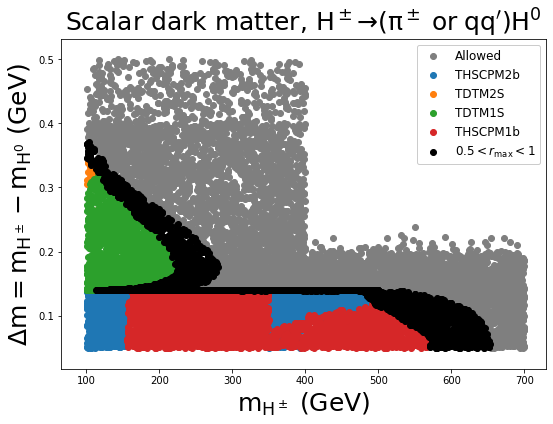

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed")
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$")


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

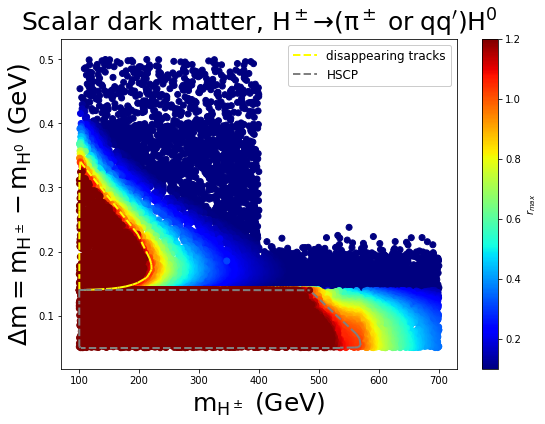

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1)
plt.colorbar(label='$r_{max}$')

####Disappearing tracks
frame_analysis2d=dt[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
hull = ConvexHull(frame_analysis2d,qhull_options='QG4')
k=0
for simplex in hull.simplices:
    if k==0:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='yellow',label='disappearing tracks',lw=2)
        k=-1
    else:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='yellow',lw=2)
        
####HSCP
frame_analysis2d=hscp[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
hull = ConvexHull(frame_analysis2d,qhull_options='QG4')
k=0
for simplex in hull.simplices:
    if k==0:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='grey',label='HSCP',lw=2)
        k=-1
    else:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='grey',lw=2)

lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

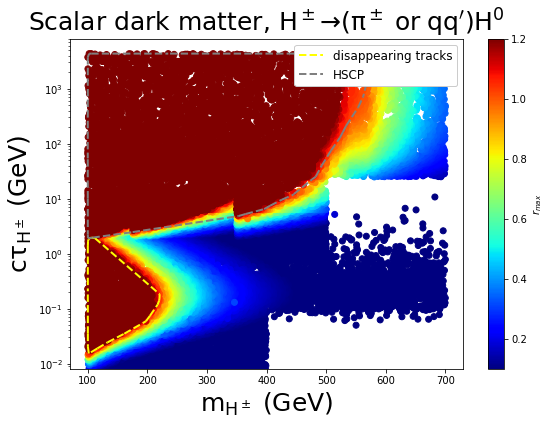

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1)
plt.colorbar(label='$r_{max}$')

####Disappearing tracks
frame_analysis2d=dt[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
hull = ConvexHull(frame_analysis2d,qhull_options='QG4')
k=0
for simplex in hull.simplices:
    if k==0:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='yellow',label='disappearing tracks',lw=2)
        k=-1
    else:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='yellow',lw=2)
        
####HSCP
frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
hull = ConvexHull(frame_analysis2d,qhull_options='QG4')
k=0
for simplex in hull.simplices:
    if k==0:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='grey',label='HSCP',lw=2)
        k=-1
    else:
        plt.plot(frame_analysis2d[simplex, 0], frame_analysis2d[simplex, 1], 'r--',color='grey',lw=2)

lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.yscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

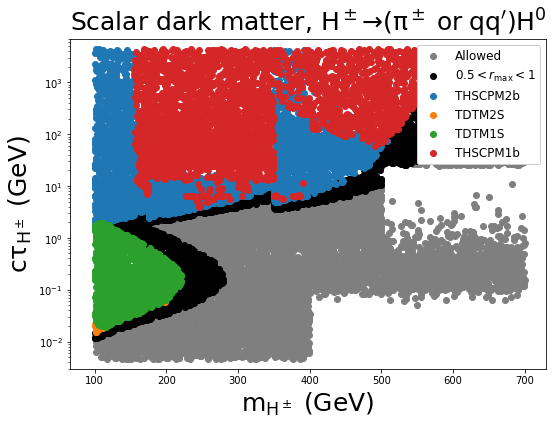

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed")
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$")
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

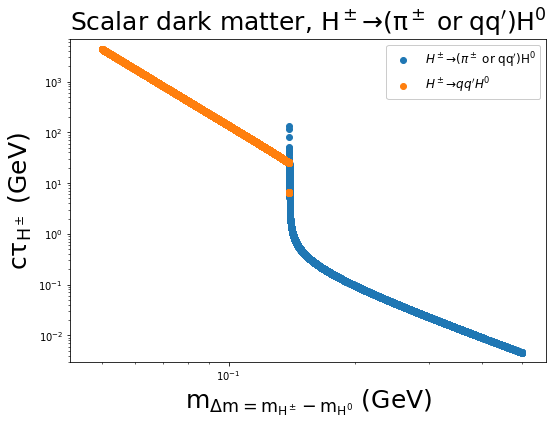

In [105]:
plt.figure(figsize=(8,6))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0$")
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to qq' H^0$")



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;qq') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()